In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib

In [ ]:

df = pd.read_csv('mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [ ]:

df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:

#1.df.head(), df.info(), df.shape, df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
#2..nunique() для всех признаков
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [ ]:
#3.Проверить баланс классов: df['class'].value_counts(normalize=True)
df['class'].value_counts(normalize=True).round(2)

,proportion
class,
e,0.52
p,0.48


In [ ]:
#4..isnull().sum() и поиск пропусков (?)
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:

(df == '?').sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:

#5.Частота по признаку odor, cap-color, habitat
df[['odor', 'cap-color', 'habitat']].value_counts()

odor  cap-color  habitat
n     n          d          600
      e          d          576
      g          d          576
      w          g          412
      g          g          400
                           ... 
      c          p            8
      g          p            8
      y          l            8
      p          p            8
      w          l            8
Name: count, Length: 86, dtype: int64

In [ ]:

#6.Сводные таблицы:
#pd.crosstab(df['class'], df['odor'])
#df.groupby('class')['cap-shape'].value_counts(normalize=True)
#df.groupby('habitat')['class'].value_counts()
pd.crosstab(df['class'], df['odor'])
df.groupby('class')['cap-shape'].value_counts(normalize=True)
df.groupby('habitat')['class'].value_counts()

habitat  class
d        e        1880
         p        1268
g        e        1408
         p         740
l        p         592
         e         240
m        e         256
         p          36
p        p        1008
         e         136
u        p         272
         e          96
w        e         192
Name: count, dtype: int64

In [ ]:

#7.One-hot временно и .corr() → sns.heatmap()

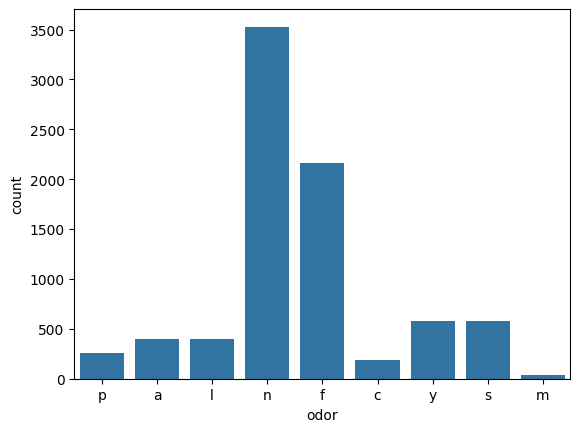

In [ ]:

#8.sns.countplot() для: odor, population, habitat
sns.countplot(df, x='odor')
plt.show()

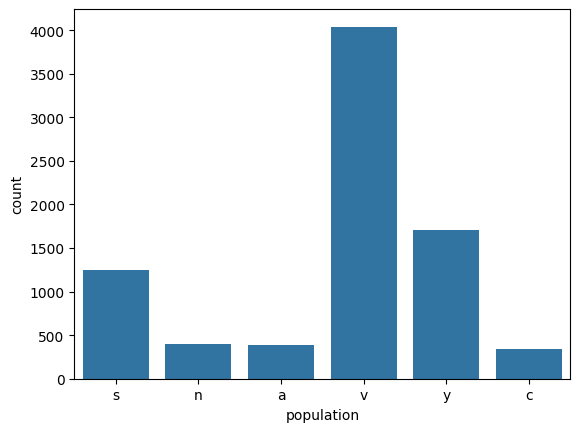

In [ ]:
sns.countplot(df, x='population')
plt.show()

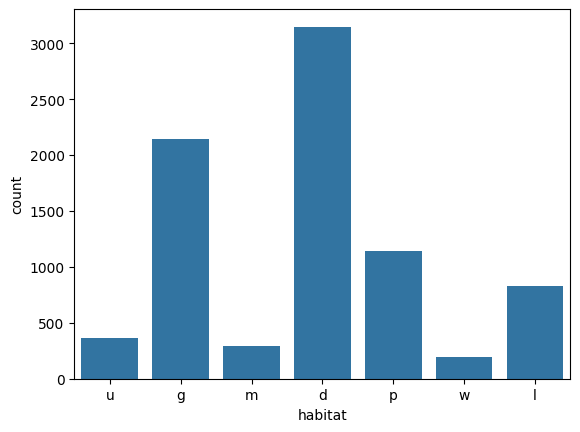

In [ ]:

sns.countplot(df, x='habitat')
plt.show()


#ЭТАП 2: Предобработка

In [ ]:
#1.Заменить ? в stalk-root на np.nan, затем:
#Заполнить модой / удалить
#.fillna(df['stalk-root'].mode()[0])
df['stalk-root'] = df['stalk-root'].replace('?', np.nan)

In [ ]:

df['stalk-root'] = df['stalk-root'].fillna(df['stalk-root'].mode()[0])

In [ ]:
#2.Кодировка признаков:
#One-Hot: pd.get_dummies(df.drop('class', axis=1))
#LabelEncoder для логистики: for col in df.columns: LabelEncoder().fit_transform(...)
df = pd.get_dummies(df, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                                 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                                 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                                 'stalk-surface-below-ring', 'stalk-color-above-ring',
                                 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                                 'ring-type', 'spore-print-color', 'population', 'habitat'], drop_first=True, dtype=int)

In [ ]:
#3.Перевести class: e → 0, p → 1
df['class'] = df['class'].map({'e': 0, 'p': 1})

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns='class'))

In [ ]:

x = scaled_data
y = df['class']

In [ ]:
#4.Train/Test split (80/20)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:

#ЭТАП 3: ML Модели (LogReg vs Tree)

In [ ]:

#Модель 1: Логистическая регрессия

log_model = LogisticRegression()

In [ ]:

log_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:

y_pred = log_model.predict(x_test)

In [ ]:
#Метрики: accuracy_score, precision_score, recall_score, f1_score

round(accuracy_score(y_pred, y_test), 2)

1.0

In [ ]:

round(precision_score(y_pred, y_test), 2)

1.0

In [ ]:

round(recall_score(y_pred, y_test), 2)

1.0

In [ ]:

round(f1_score(y_pred, y_test), 2)

1.0

In [ ]:

#Модель 2: Decision Tree Classifier

In [ ]:

tree_model = DecisionTreeClassifier()

In [ ]:

tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:

y_pred_tree = tree_model.predict(x_test)

In [ ]:

round(f1_score(y_pred_tree, y_test), 2)

1.0

In [ ]:
random_model = RandomForestClassifier()


In [ ]:
random_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:

y_pred_random = random_model.predict(x_test)

In [ ]:
round(f1_score(y_pred_random, y_test), 2)

1.0

In [ ]:
joblib.dump(random_model, 'random_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:

df.dtypes

,0
class,int64
cap-shape_c,int64
cap-shape_f,int64
cap-shape_k,int64
cap-shape_s,int64
...,...
habitat_l,int64
habitat_m,int64
habitat_p,int64
habitat_u,int64


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class                       8124 non-null   int64
 1   cap-shape_c                 8124 non-null   int64
 2   cap-shape_f                 8124 non-null   int64
 3   cap-shape_k                 8124 non-null   int64
 4   cap-shape_s                 8124 non-null   int64
 5   cap-shape_x                 8124 non-null   int64
 6   cap-surface_g               8124 non-null   int64
 7   cap-surface_s               8124 non-null   int64
 8   cap-surface_y               8124 non-null   int64
 9   cap-color_c                 8124 non-null   int64
 10  cap-color_e                 8124 non-null   int64
 11  cap-color_g                 8124 non-null   int64
 12  cap-color_n                 8124 non-null   int64
 13  cap-color_p                 8124 non-null   int64
 14  cap-colo